# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     naive_bayes,
                     neighbors)

In [3]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# Iris Dataset

In [12]:
iris = datasets.load_iris()
# print(iris.DESCR)

In [14]:
iris_df = pd.DataFrame(iris.data, 
                       columns=iris.feature_names)
iris_df['tgt'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tgt
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [15]:
iris_df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tgt
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tgt
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
iris_df.tgt.value_counts()

0    50
1    50
2    50
Name: tgt, dtype: int64

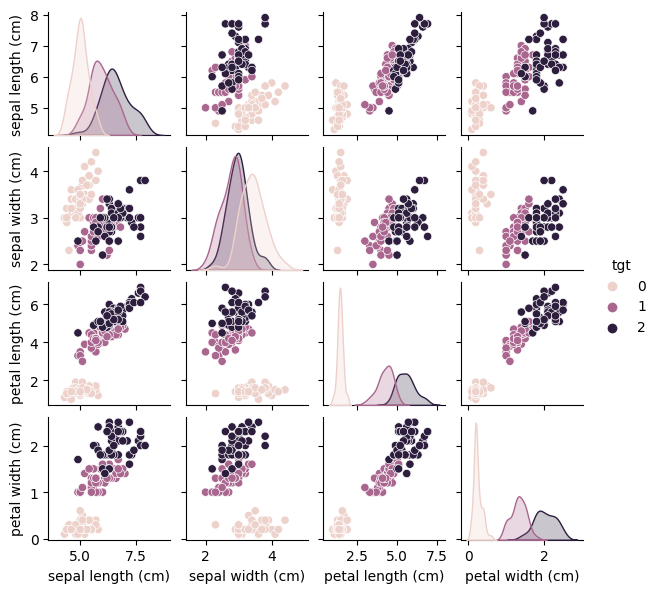

In [18]:
sns.pairplot(iris_df, hue='tgt', height=1.5);

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Accuracy

In [20]:
answer_key  = np.array([True, True, False, True])
student_ans = np.array([True, True, True, True])

In [21]:
correct = answer_key == student_ans
correct

array([ True,  True, False,  True])

In [22]:
correct.sum()

3

In [23]:
correct.sum() / len(answer_key)

0.75

In [24]:
actuals = np.array([True, True, False, True])
preds   = np.array([True, True, True, True])

In [25]:
correct = actuals == preds
correct.sum() / len(actuals)

0.75

In [26]:
metrics.accuracy_score(actuals, preds)

0.75

# k-Nearest Neighbors

In [27]:
ftrs = np.random.randint(1,7, (8,2))
ftrs

array([[4, 5],
       [3, 5],
       [5, 2],
       [3, 3],
       [3, 5],
       [4, 3],
       [6, 5],
       [2, 4]])

In [28]:
tgts = np.random.randint(0,2,8)
tgts

array([1, 1, 1, 1, 1, 0, 0, 1])

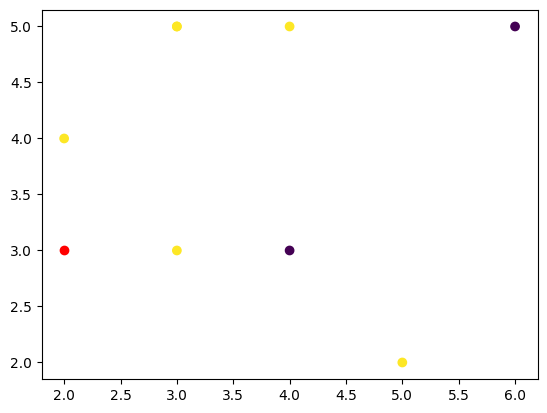

In [29]:
plt.scatter(ftrs[:,0], ftrs[:,1], c=tgts)
tst = (2,3)
plt.scatter(*tst, c='r')

In [30]:
# c^2 = a^2 + b^2
# a:  difference in xs between me and someone else
# b:  difference in ys between me and someone else
distances = np.hypot(2-ftrs[:,0], 3-ftrs[:,1])
distances

array([2.82842712, 2.23606798, 3.16227766, 1.        , 2.23606798,
       2.        , 4.47213595, 1.        ])

In [31]:
distances.argsort()

array([3, 7, 5, 1, 4, 0, 2, 6])

# Train-Test Split

In [32]:
# D --> (training, testing)
#        studying from ..... see on an exam
(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt,  iris_test_tgt) = skms.train_test_split(iris.data,
                                                         iris.target,
                                                         test_size=.95)
len(iris_train_ftrs), len(iris_test_ftrs)

(7, 143)

# kNN Fitting

In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

actuals = iris_test_tgt
metrics.accuracy_score(actuals, preds)

0.6503496503496503

In [34]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

actuals = iris_test_tgt
metrics.accuracy_score(actuals, preds)

0.32167832167832167

In [35]:
# 1-NN is purely memorizes the test (the training data)
memorizer = neighbors.KNeighborsClassifier(n_neighbors=1)
memorizer.fit(iris_train_ftrs, iris_train_tgt)
preds = memorizer.predict(iris_train_ftrs)
metrics.accuracy_score(iris_train_tgt, preds)

1.0

In [36]:
preds = memorizer.predict(iris_test_ftrs)
metrics.accuracy_score(iris_test_tgt, preds)

0.6503496503496503

# Naive Bayes

In [37]:
prefs = """cat tea    red
           cat coffee red
           cat tea    red
           dog coffee red
           cat tea    black
           dog coffee black
           dog coffee black
           dog tea    black""".split()
df = pd.DataFrame(np.array(prefs).reshape(8,3),
                  columns=['pet', 'drink', 'color'])
df

,pet,drink,color
0,cat,tea,red
1,cat,coffee,red
2,cat,tea,red
3,dog,coffee,red
4,cat,tea,black
5,dog,coffee,black
6,dog,coffee,black
7,dog,tea,black


In [34]:
pd.crosstab(df.drink, df.color)

color,black,red
drink,,
coffee,2,2
tea,2,2


In [35]:
pd.crosstab(df.pet, df.color)

color,black,red
pet,,
cat,1,3
dog,3,1


In [39]:
red_data = df.groupby('color').get_group('red')
red_data.pet.value_counts(normalize=True)

cat    0.75
dog    0.25
Name: pet, dtype: float64

In [40]:
red_data.drink.value_counts(normalize=True)

tea       0.5
coffee    0.5
Name: drink, dtype: float64

In [41]:
df.color.value_counts(normalize=True)

red      0.5
black    0.5
Name: color, dtype: float64

In [ ]:
# see someone:  cat, coffee
# ??? ---> red, black?

# probability of red versus black .... when we see cat coffee
# 
# assume that its red
# probability of red when cat, coffee?
# ---> p(coffee | red) * p(cat | red) * p(red)
#              .5           .75          .5
# ---> compare that value with assuming black is the case
# red is the more likely result

In [42]:
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)

0.6433566433566433